## 회귀분석

In [3]:
import pandas as pd

In [4]:
anal_df = pd.read_csv("C:/data/now_used/real_final_data.csv")
anal_df.head(5)

,건축물대장코드,도시,구시군,읍면동,번,지,입주일,지하총층,지상총층,연면적m2,...,아파트거리,주변세대수점수,주변평당가점수,type_근린상가,type_기타상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
0,11110-10014,서울특별시,종로구,동숭동,1,114,1982-12-24,1,5,1563.66,...,519.940374,1.176,10.477,1,0,0,0,0,1,1
1,11110-100180009,서울특별시,종로구,동숭동,1,67,2008-07-03,4,5,8585.08,...,497.856179,1.207,10.754,0,1,0,0,1,1,2
2,11110-100184402,서울특별시,종로구,관훈동,186,0,2008-12-29,0,3,172.11,...,249.441747,0.363,19.104,1,0,0,0,0,1,1
3,11110-100190514,서울특별시,종로구,누하동,245,6,2011-09-28,0,4,233.03,...,426.832578,1.979,16.353,1,0,0,0,1,0,1
4,11110-100190842,서울특별시,종로구,효제동,19,3,2011-10-14,0,5,253.80,...,491.694446,0.810,10.063,1,0,0,0,0,0,1


In [5]:
anal_df.columns

Index(['건축물대장코드', '도시', '구시군', '읍면동', '번', '지', '입주일', '지하총층', '지상총층', '연면적m2',
       '주차대수', '승강기수', 'usage_area', 'cont_area', 'RENT', 'rent_ua', 'rent_ca',
       '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가',
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수', 'type_근린상가',
       'type_기타상가', 'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부', '상가유형번호'],
      dtype='object')

In [7]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model1 = ols('rent_ua ~ usage_area + 지하총층 + 지상총층 + 연면적m2 + 주차대수 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 아파트거리 + 가까운아파트평균평당가 + 주변평당가점수 + type_근린상가 + type_기타상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부 + 상가유형번호', anal_df)

# 모형 적합

res = model1.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     246.1
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:04:41   Log-Likelihood:                -22661.
No. Observations:                9289   AIC:                         4.537e+04
Df Residuals:                    9267   BIC:                         4.552e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9607      0.131      7.325      0.000       0.704       1.218
usage_area     -0.0005   4.81e-05     -9.761      0.000      -0.001      -0.000
지하총층           -0.1037      0.049     -2.137      0.033      -0.199      -0.009
지상총층           -0.0536      0.019     -2.816      0.005      -0.091      -0.016
연면적m2        3.585e-06   1.91e-05      0.188      0.851   -3.39e-05     4.1e-05
주차대수           -0.0016      0.002     -1.036      0.300      -0.005       0.001
승강기수            0.1671      0.065      2.556      0.011       0.039       0.295
지하철거리m         -0.0469      0.010     -4.533      0.000      -0.067      -0.027
승객수점수         4.45e-06   4.82e-07      9.229      0.000     3.5e-06    5.39e-06
횡단보도거리m        -0.0019      0.001     -2.736      0.006      -0.003      -0.001
건물별전기사용량     3.203e-06   1.13e-06      2.832      0.005    9.86e-07    5.42e-06
본번별평균사용량     3.057e-06   7.87e-07      3.883      0.000    1.51e-06     4.6e-06
건물연차           -0.0102      0.003     -3.113      0.002      -0.017      -0.004
공시지가         3.189e-07   5.87e-09     54.360      0.000    3.07e-07     3.3e-07
아파트거리          -0.0002      0.000     -0.884      0.377      -0.001       0.000
가까운아파트평균평당가 -7.449e-05   2.84e-05     -2.627      0.009      -0.000   -1.89e-05
주변평당가점수        -0.0009      0.001     -0.901      0.368      -0.003       0.001
type_근린상가       1.5563      0.090     17.349      0.000       1.380       1.732
type_기타상가      -0.0799      0.177     -0.451      0.652      -0.427       0.267
type_단지내상가      0.8301      0.306      2.716      0.007       0.231       1.429
type_복합상가      -1.3457      0.358     -3.757      0.000      -2.048      -0.643
주차가능여부         -0.2128      0.070     -3.026      0.002      -0.351      -0.075
승강기여부           0.3076      0.113      2.723      0.006       0.086       0.529
상가유형번호          0.6796      0.136      4.987      0.000       0.412       0.947
==============================================================================
Omnibus:                     7656.810   Durbin-Watson:                   1.796
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           486723.253
Skew:                           3.533   Prob(JB):                         0.00
Kurtosis:                      37.751   Cond. No.                     1.73e+23
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.37e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [8]:
# 회귀분석(p-value > 0.05 제외)

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model1 = ols('rent_ua ~ usage_area + 지하총층 + 지상총층 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트평균평당가 + type_근린상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부 + 상가유형번호', anal_df)

# 모형 적합

res = model1.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     303.8
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:05:33   Log-Likelihood:                -22663.
No. Observations:                9289   AIC:                         4.536e+04
Df Residuals:                    9271   BIC:                         4.549e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.9232      0.283      3.261      0.001       0.368       1.478
usage_area     -0.0005   4.81e-05     -9.820      0.000      -0.001      -0.000
지하총층           -0.1009      0.048     -2.105      0.035      -0.195      -0.007
지상총층           -0.0564      0.018     -3.162      0.002      -0.091      -0.021
승강기수            0.1305      0.051      2.570      0.010       0.031       0.230
지하철거리m         -0.0471      0.010     -4.583      0.000      -0.067      -0.027
승객수점수        4.451e-06   4.82e-07      9.243      0.000    3.51e-06     5.4e-06
횡단보도거리m        -0.0019      0.001     -2.767      0.006      -0.003      -0.001
건물별전기사용량     3.038e-06    9.2e-07      3.301      0.001    1.23e-06    4.84e-06
본번별평균사용량     3.071e-06   7.82e-07      3.929      0.000    1.54e-06     4.6e-06
건물연차           -0.0103      0.003     -3.168      0.002      -0.017      -0.004
공시지가         3.193e-07   5.79e-09     55.117      0.000    3.08e-07    3.31e-07
가까운아파트평균평당가 -8.252e-05   2.71e-05     -3.048      0.002      -0.000   -2.95e-05
type_근린상가       1.5880      0.160      9.900      0.000       1.274       1.902
type_단지내상가      0.8744      0.417      2.097      0.036       0.057       1.692
type_복합상가      -1.3617      0.353     -3.854      0.000      -2.054      -0.669
주차가능여부         -0.2231      0.070     -3.209      0.001      -0.359      -0.087
승강기여부           0.3495      0.103      3.409      0.001       0.149       0.550
상가유형번호          0.6454      0.134      4.815      0.000       0.383       0.908
==============================================================================
Omnibus:                     7660.898   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           486041.118
Skew:                           3.537   Prob(JB):                         0.00
Kurtosis:                      37.724   Cond. No.                     2.35e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.83e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x25ec6373280>,
 'caps': [<matplotlib.lines.Line2D at 0x25ec6373940>,
 'boxes': [<matplotlib.lines.Line2D at 0x25ec6362ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x25ec637f040>],
 'fliers': [<matplotlib.lines.Line2D at 0x25ec637f340>],
 'means': []}

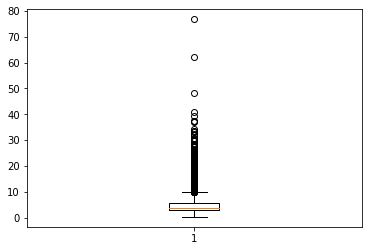

In [10]:
# rent_ua 이상치 파악

min = np.percentile(anal_df['rent_ua'],0)
q1 = np.percentile(anal_df['rent_ua'],25)
q2 = np.percentile(anal_df['rent_ua'],50)
q3 = np.percentile(anal_df['rent_ua'],75)
max = np.percentile(anal_df['rent_ua'],100)

IQR = q3 - q1
iqr = q3 - q1
lf = q1 - 1.5 * iqr
uf = q3 + 1.5 * iqr


plt.boxplot(anal_df['rent_ua'])

## rent_ua 컬럼 이상치 제거

In [11]:
# rent_ua 이상치 제거
anal_df2 = anal_df.copy()

q1 = anal_df2['rent_ua'].quantile(0.25)
q3 = anal_df2['rent_ua'].quantile(0.75)
iqt = 1.5 * (q3-q1)

In [12]:
anal_df2.columns

Index(['건축물대장코드', '도시', '구시군', '읍면동', '번', '지', '입주일', '지하총층', '지상총층', '연면적m2',
       '주차대수', '승강기수', 'usage_area', 'cont_area', 'RENT', 'rent_ua', 'rent_ca',
       '지하철거리m', '승객수점수', '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가',
       '가까운아파트총세대수', '가까운아파트평균평당가', '아파트거리', '주변세대수점수', '주변평당가점수', 'type_근린상가',
       'type_기타상가', 'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부', '상가유형번호'],
      dtype='object')

In [13]:
z = anal_df2[['지하총층', '지상총층',
       '승강기수', 'usage_area', 
       'rent_ua', '지하철거리m', '승객수점수', '건물별전기사용량',
       '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가',
       '가까운아파트평균평당가', 
       'type_근린상가', 'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부',
       '상가유형번호']]

In [14]:
z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
z

<ipython-input-14-5b6fb51fab7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z['rent_ua'][(z['rent_ua'] > (q3 + iqt)) | (z['rent_ua'] < (q1 - iqt))] = None
C:\python\lib\site-packages\pandas\core\generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,지하총층,지상총층,승강기수,usage_area,rent_ua,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,공시지가,가까운아파트평균평당가,type_근린상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
0,1,5,1,15.50,NaN,1.082077,71533.898,11937,15813.56,45.543627,38,22840000,1506.40,1,0,0,0,1,1
1,4,5,4,103.00,NaN,1.373136,117064.164,57888,15813.56,96.055953,12,16310000,1506.40,0,0,0,1,1,2
2,0,3,1,185.00,NaN,2.508637,46623.003,3261,3261.00,130.888597,12,24600000,2008.50,1,0,0,0,1,1
3,0,4,0,58.22,3.778770,4.791703,29040.490,2650,2650.00,10.823416,9,7727000,2695.24,1,0,0,1,0,1
4,0,5,0,58.90,2.037351,3.818611,34219.916,209,390.00,39.418864,9,4878000,2046.33,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9284,1,4,0,783.79,2.156190,4.357042,8921.374,2408,3264.43,16.357351,32,5684000,3703.89,1,0,0,1,0,1
9285,1,3,0,41.19,NaN,0.729846,33569.452,18399,12269.25,23.462974,40,12580000,1166.60,1,0,0,0,0,1
9286,1,2,0,127.60,3.761755,2.046134,16942.142,14429,8845.75,97.750285,39,6444000,1166.60,1,0,0,1,0,1
9287,1,4,0,291.07,4.672416,6.165909,22247.037,4695,9900.00,21.561184,27,6762000,1666.00,1,0,0,1,0,1


In [15]:
z.isnull().sum()

지하총층             0
지상총층             0
승강기수             0
usage_area       0
rent_ua        542
지하철거리m           0
승객수점수            0
건물별전기사용량         0
본번별평균사용량         0
횡단보도거리m          0
건물연차             0
공시지가             0
가까운아파트평균평당가      0
type_근린상가        0
type_단지내상가       0
type_복합상가        0
주차가능여부           0
승강기여부            0
상가유형번호           0
dtype: int64

In [16]:
z = z.dropna(axis = 0, how = 'any')
z.isnull().sum()

지하총층           0
지상총층           0
승강기수           0
usage_area     0
rent_ua        0
지하철거리m         0
승객수점수          0
건물별전기사용량       0
본번별평균사용량       0
횡단보도거리m        0
건물연차           0
공시지가           0
가까운아파트평균평당가    0
type_근린상가      0
type_단지내상가     0
type_복합상가      0
주차가능여부         0
승강기여부          0
상가유형번호         0
dtype: int64

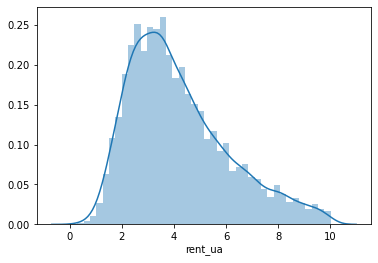

In [18]:
sns.distplot(z.iloc[:,4])
plt.show()

In [26]:
import scipy as sp
import scipy.stats as stats

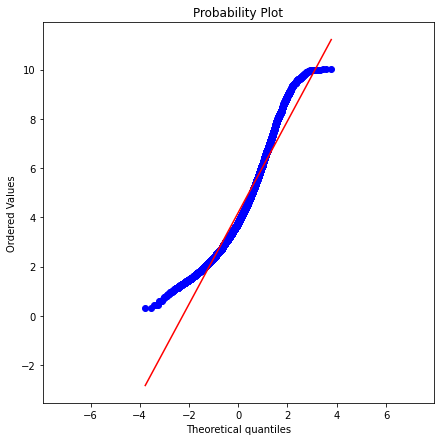

In [27]:
x = z.iloc[:,4]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

In [28]:
# 이상값 다시 제거

q1 = z["rent_ua"].quantile(0.25)
q3 = z["rent_ua"].quantile(0.75)
iqt = 1.5 * (q3 - q1)
z1 = z.copy()
z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None
z1

<ipython-input-28-02376eca61ea>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z1["rent_ua"][(z1["rent_ua"] > (q3 + iqt)) | (z1["rent_ua"] < (q1 - iqt))] = None


,지하총층,지상총층,승강기수,usage_area,rent_ua,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,공시지가,가까운아파트평균평당가,type_근린상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,0,58.22,3.778770,4.791703,29040.490,2650,2650.00,10.823416,9,7727000,2695.24,1,0,0,1,0,1
4,0,5,0,58.90,2.037351,3.818611,34219.916,209,390.00,39.418864,9,4878000,2046.33,1,0,0,0,0,1
6,5,6,2,370.05,4.323740,2.095677,41692.829,25836,15813.56,168.113254,7,11340000,1506.40,0,0,0,1,1,2
8,1,3,0,76.03,5.392608,1.090460,59317.670,37201,37201.00,26.745713,34,17040000,2008.50,1,0,0,1,0,1
9,1,4,0,73.03,4.792551,3.944218,24836.371,329,2033.50,70.496126,31,8977000,1506.40,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,1,5,0,440.82,4.196724,3.577587,47394.330,77223,24943.67,32.886787,26,9184000,1548.00,1,0,0,1,0,1
9284,1,4,0,783.79,2.156190,4.357042,8921.374,2408,3264.43,16.357351,32,5684000,3703.89,1,0,0,1,0,1
9286,1,2,0,127.60,3.761755,2.046134,16942.142,14429,8845.75,97.750285,39,6444000,1166.60,1,0,0,1,0,1
9287,1,4,0,291.07,4.672416,6.165909,22247.037,4695,9900.00,21.561184,27,6762000,1666.00,1,0,0,1,0,1


In [29]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8747 entries, 3 to 9288
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지하총층         8747 non-null   int64  
 1   지상총층         8747 non-null   int64  
 2   승강기수         8747 non-null   int64  
 3   usage_area   8747 non-null   float64
 4   rent_ua      8591 non-null   float64
 5   지하철거리m       8747 non-null   float64
 6   승객수점수        8747 non-null   float64
 7   건물별전기사용량     8747 non-null   int64  
 8   본번별평균사용량     8747 non-null   float64
 9   횡단보도거리m      8747 non-null   float64
 10  건물연차         8747 non-null   int64  
 11  공시지가         8747 non-null   int64  
 12  가까운아파트평균평당가  8747 non-null   float64
 13  type_근린상가    8747 non-null   int64  
 14  type_단지내상가   8747 non-null   int64  
 15  type_복합상가    8747 non-null   int64  
 16  주차가능여부       8747 non-null   int64  
 17  승강기여부        8747 non-null   int64  
 18  상가유형번호       8747 non-null   int64  
dtypes: flo

In [30]:
z1 = z1.dropna(axis = 0, how = 'any')
z1

,지하총층,지상총층,승강기수,usage_area,rent_ua,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,공시지가,가까운아파트평균평당가,type_근린상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,0,58.22,3.778770,4.791703,29040.490,2650,2650.00,10.823416,9,7727000,2695.24,1,0,0,1,0,1
4,0,5,0,58.90,2.037351,3.818611,34219.916,209,390.00,39.418864,9,4878000,2046.33,1,0,0,0,0,1
6,5,6,2,370.05,4.323740,2.095677,41692.829,25836,15813.56,168.113254,7,11340000,1506.40,0,0,0,1,1,2
8,1,3,0,76.03,5.392608,1.090460,59317.670,37201,37201.00,26.745713,34,17040000,2008.50,1,0,0,1,0,1
9,1,4,0,73.03,4.792551,3.944218,24836.371,329,2033.50,70.496126,31,8977000,1506.40,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,1,5,0,440.82,4.196724,3.577587,47394.330,77223,24943.67,32.886787,26,9184000,1548.00,1,0,0,1,0,1
9284,1,4,0,783.79,2.156190,4.357042,8921.374,2408,3264.43,16.357351,32,5684000,3703.89,1,0,0,1,0,1
9286,1,2,0,127.60,3.761755,2.046134,16942.142,14429,8845.75,97.750285,39,6444000,1166.60,1,0,0,1,0,1
9287,1,4,0,291.07,4.672416,6.165909,22247.037,4695,9900.00,21.561184,27,6762000,1666.00,1,0,0,1,0,1


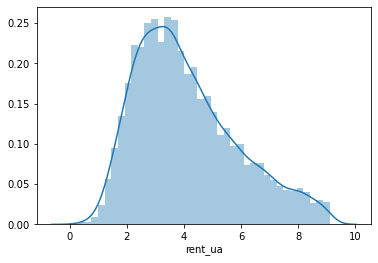

In [31]:
sns.distplot(z1.iloc[:,4])
plt.show()

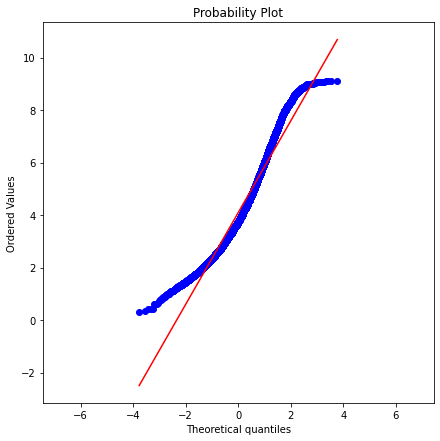

In [32]:
x = z1.iloc[:,4]
plt.figure(figsize = (7,7))
sp.stats.probplot(x, plot = plt)
plt.axis('equal')
plt.show()

## 상관계수 히트맵 그려보기

In [33]:
# 상관계수 확인

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'

# 스피어만 상관계수

corr_ua_s = z1.corr(method = 'spearman')
corr_ua_s

,지하총층,지상총층,승강기수,usage_area,rent_ua,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,공시지가,가까운아파트평균평당가,type_근린상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
지하총층,1.000000,0.476594,0.373684,0.178501,0.117466,-0.009108,0.154973,0.422010,0.355623,0.002109,-0.238559,0.205491,0.118208,-0.411948,0.079449,0.231353,0.212151,0.339760,0.415419
지상총층,0.476594,1.000000,0.621230,0.256181,0.157253,-0.021406,0.174733,0.450593,0.341545,0.034882,-0.609510,0.263881,0.155495,-0.404995,0.067841,0.191034,0.485295,0.612166,0.406954
승강기수,0.373684,0.621230,1.000000,0.245526,0.185481,-0.045769,0.177142,0.408742,0.332877,0.031383,-0.565770,0.198528,0.101249,-0.401734,0.083166,0.238518,0.341149,0.993893,0.405664
usage_area,0.178501,0.256181,0.245526,1.000000,0.042949,-0.058687,0.274262,0.186870,0.222700,0.014041,-0.198104,0.275004,0.123952,-0.156136,0.007144,0.044271,0.173545,0.249465,0.155559
rent_ua,0.117466,0.157253,0.185481,0.042949,1.000000,-0.228438,0.349212,0.307285,0.350408,-0.083912,-0.062162,0.559734,0.206453,-0.144146,0.040080,0.073622,0.046984,0.176832,0.145283
지하철거리m,-0.009108,-0.021406,-0.045769,-0.058687,-0.228438,1.000000,-0.472455,-0.115010,-0.161520,-0.045603,-0.017108,-0.248393,-0.055443,0.064248,-0.009230,-0.009871,0.058477,-0.042484,-0.063807
승객수점수,0.154973,0.174733,0.177142,0.274262,0.349212,-0.472455,1.000000,0.222567,0.286012,0.081515,-0.095179,0.424297,0.108885,-0.174520,0.021730,0.089499,0.032448,0.171547,0.175508
건물별전기사용량,0.422010,0.450593,0.408742,0.186870,0.307285,-0.115010,0.222567,1.000000,0.630205,-0.096480,-0.176914,0.361410,0.089465,-0.366281,0.065706,0.175307,0.223518,0.388493,0.368208
본번별평균사용량,0.355623,0.341545,0.332877,0.222700,0.350408,-0.161520,0.286012,0.630205,1.000000,-0.053645,-0.149715,0.430745,0.152302,-0.337461,0.055288,0.169195,0.177958,0.311652,0.339433
횡단보도거리m,0.002109,0.034882,0.031383,0.014041,-0.083912,-0.045603,0.081515,-0.096480,-0.053645,1.000000,-0.147805,-0.061531,0.062075,0.011904,0.004993,0.030408,0.104905,0.031263,-0.010572


In [34]:
import matplotlib.pylab as plt
from matplotlib import pyplot
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:/windows/fonts/malgun.ttf').get_name()
rc('font', family = font_name)

C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


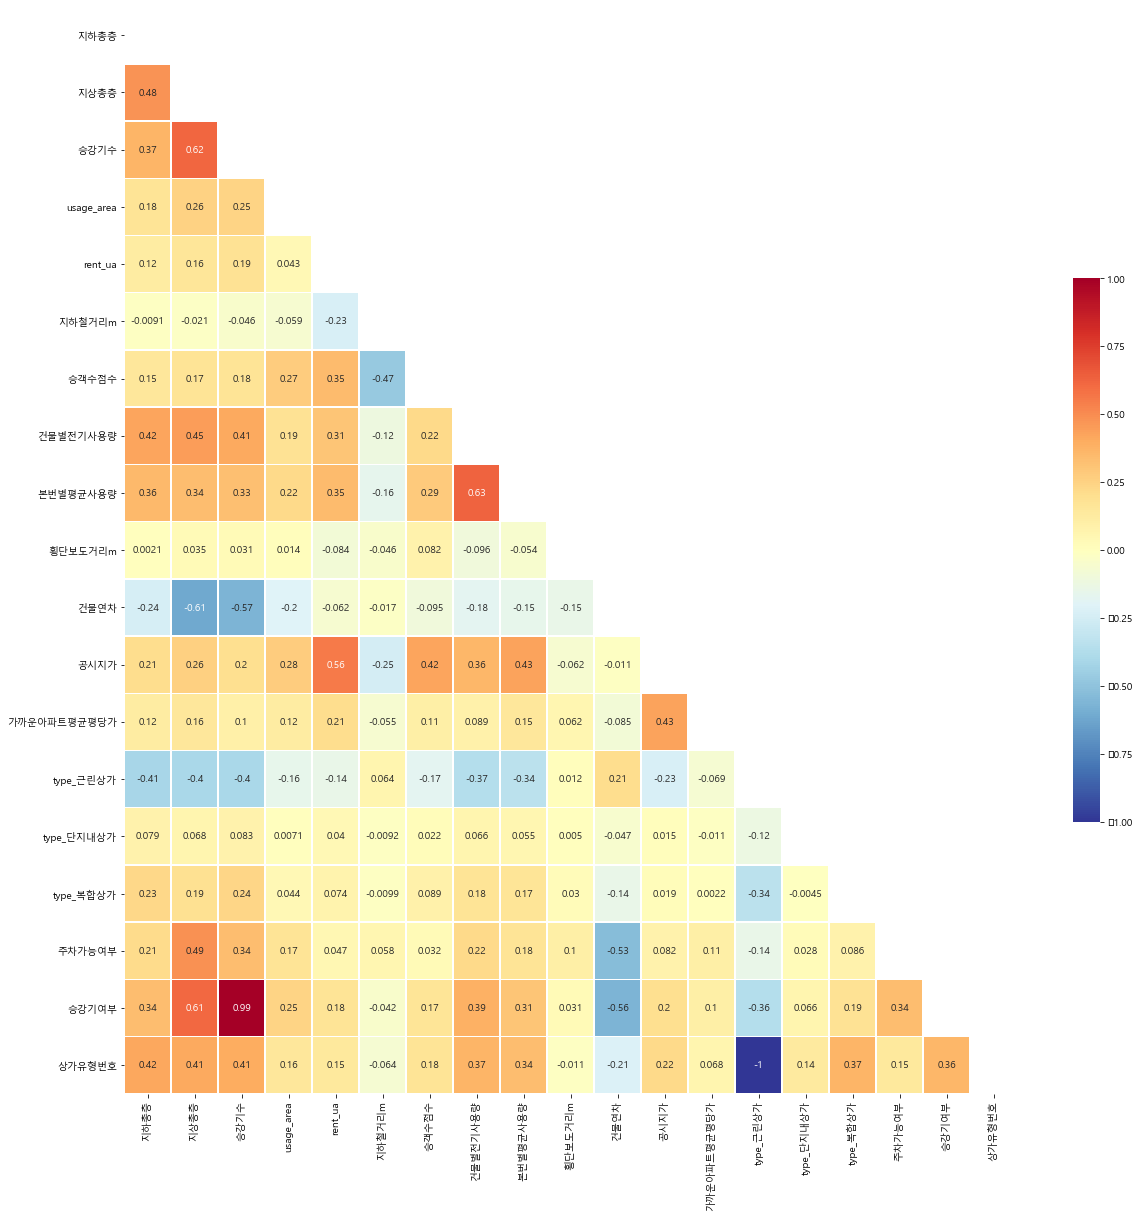

In [35]:
# 스피어만 상관계수 히트맵

mask = np.zeros_like(corr_ua_s, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(20,20) )

sns.heatmap(corr_ua_s,
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

## 주요컬럼 이상치 제거
* 지하철거리m, 승객수점수, 건물별전기사용량, 본번별평균사용량, 공시지가, 가까운아파트평균평당가

In [61]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8591 entries, 3 to 9288
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   지하총층         8591 non-null   int64  
 1   지상총층         8591 non-null   int64  
 2   승강기수         8591 non-null   int64  
 3   usage_area   8591 non-null   float64
 4   rent_ua      8591 non-null   float64
 5   지하철거리m       8591 non-null   float64
 6   승객수점수        8591 non-null   float64
 7   건물별전기사용량     8591 non-null   int64  
 8   본번별평균사용량     8591 non-null   float64
 9   횡단보도거리m      8591 non-null   float64
 10  건물연차         8591 non-null   int64  
 11  공시지가         8591 non-null   int64  
 12  가까운아파트평균평당가  8591 non-null   float64
 13  type_근린상가    8591 non-null   int64  
 14  type_단지내상가   8591 non-null   int64  
 15  type_복합상가    8591 non-null   int64  
 16  주차가능여부       8591 non-null   int64  
 17  승강기여부        8591 non-null   int64  
 18  상가유형번호       8591 non-null   int64  
dtypes: flo

In [62]:
# 승객수점수 이상값 제거

q1 = z1["승객수점수"].quantile(0.25)
q3 = z1["승객수점수"].quantile(0.75)
iqt = 1.8 * (q3 - q1)
z2 = z1.copy()
z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None

z2 = z2.dropna(axis = 0, how= 'any')
z2

<ipython-input-62-ccb73941d950>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z2["승객수점수"][(z2["승객수점수"] > (q3 + iqt)) | (z2["승객수점수"] < (q1 - iqt))] = None


,지하총층,지상총층,승강기수,usage_area,rent_ua,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,공시지가,가까운아파트평균평당가,type_근린상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,0,58.22,3.778770,4.791703,29040.490,2650,2650.00,10.823416,9,7727000,2695.24,1,0,0,1,0,1
4,0,5,0,58.90,2.037351,3.818611,34219.916,209,390.00,39.418864,9,4878000,2046.33,1,0,0,0,0,1
6,5,6,2,370.05,4.323740,2.095677,41692.829,25836,15813.56,168.113254,7,11340000,1506.40,0,0,0,1,1,2
8,1,3,0,76.03,5.392608,1.090460,59317.670,37201,37201.00,26.745713,34,17040000,2008.50,1,0,0,1,0,1
9,1,4,0,73.03,4.792551,3.944218,24836.371,329,2033.50,70.496126,31,8977000,1506.40,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,1,5,0,440.82,4.196724,3.577587,47394.330,77223,24943.67,32.886787,26,9184000,1548.00,1,0,0,1,0,1
9284,1,4,0,783.79,2.156190,4.357042,8921.374,2408,3264.43,16.357351,32,5684000,3703.89,1,0,0,1,0,1
9286,1,2,0,127.60,3.761755,2.046134,16942.142,14429,8845.75,97.750285,39,6444000,1166.60,1,0,0,1,0,1
9287,1,4,0,291.07,4.672416,6.165909,22247.037,4695,9900.00,21.561184,27,6762000,1666.00,1,0,0,1,0,1


In [63]:
# 지하철거리m 이상값 제거

q1 = z2["지하철거리m"].quantile(0.25)
q3 = z2["지하철거리m"].quantile(0.75)
iqt = 1.8 * (q3 - q1)
z4 = z2.copy()
z4["지하철거리m"][(z4["지하철거리m"] > (q3 + iqt)) | (z4["지하철거리m"] < (q1 - iqt))] = None

z4 = z4.dropna(axis = 0, how= 'any')
z4

<ipython-input-63-f9f1cecae0e7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z4["지하철거리m"][(z4["지하철거리m"] > (q3 + iqt)) | (z4["지하철거리m"] < (q1 - iqt))] = None


,지하총층,지상총층,승강기수,usage_area,rent_ua,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,공시지가,가까운아파트평균평당가,type_근린상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,0,58.22,3.778770,4.791703,29040.490,2650,2650.00,10.823416,9,7727000,2695.24,1,0,0,1,0,1
4,0,5,0,58.90,2.037351,3.818611,34219.916,209,390.00,39.418864,9,4878000,2046.33,1,0,0,0,0,1
6,5,6,2,370.05,4.323740,2.095677,41692.829,25836,15813.56,168.113254,7,11340000,1506.40,0,0,0,1,1,2
8,1,3,0,76.03,5.392608,1.090460,59317.670,37201,37201.00,26.745713,34,17040000,2008.50,1,0,0,1,0,1
9,1,4,0,73.03,4.792551,3.944218,24836.371,329,2033.50,70.496126,31,8977000,1506.40,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9283,1,5,0,440.82,4.196724,3.577587,47394.330,77223,24943.67,32.886787,26,9184000,1548.00,1,0,0,1,0,1
9284,1,4,0,783.79,2.156190,4.357042,8921.374,2408,3264.43,16.357351,32,5684000,3703.89,1,0,0,1,0,1
9286,1,2,0,127.60,3.761755,2.046134,16942.142,14429,8845.75,97.750285,39,6444000,1166.60,1,0,0,1,0,1
9287,1,4,0,291.07,4.672416,6.165909,22247.037,4695,9900.00,21.561184,27,6762000,1666.00,1,0,0,1,0,1


In [64]:
# 건물별전기사용량 이상값 제거

q1 = z4["건물별전기사용량"].quantile(0.25)
q3 = z4["건물별전기사용량"].quantile(0.75)
iqt = 1.8 * (q3 - q1)
z5 = z4.copy()
z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None

z5 = z5.dropna(axis = 0, how= 'any')
z5

<ipython-input-64-673004cc73eb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z5["건물별전기사용량"][(z5["건물별전기사용량"] > (q3 + iqt)) | (z5["건물별전기사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,승강기수,usage_area,rent_ua,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,공시지가,가까운아파트평균평당가,type_근린상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,0,58.22,3.778770,4.791703,29040.490,2650.0,2650.00,10.823416,9,7727000,2695.24,1,0,0,1,0,1
4,0,5,0,58.90,2.037351,3.818611,34219.916,209.0,390.00,39.418864,9,4878000,2046.33,1,0,0,0,0,1
9,1,4,0,73.03,4.792551,3.944218,24836.371,329.0,2033.50,70.496126,31,8977000,1506.40,1,0,0,0,0,1
10,1,3,0,140.00,2.714286,3.709688,59466.010,3711.0,59505.27,17.078939,28,8623000,2253.00,1,0,0,1,0,1
15,1,3,0,146.71,2.249335,3.241511,60826.450,4275.0,2320.56,143.916137,36,6848000,1506.40,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9281,1,3,0,100.00,2.300000,1.606256,59177.336,7462.0,6158.30,20.580555,31,5690000,3599.75,1,0,0,1,0,1
9282,1,3,0,46.28,3.889369,3.223796,32689.020,6601.0,4814.22,51.307326,39,7689000,4633.11,1,0,0,0,0,1
9284,1,4,0,783.79,2.156190,4.357042,8921.374,2408.0,3264.43,16.357351,32,5684000,3703.89,1,0,0,1,0,1
9286,1,2,0,127.60,3.761755,2.046134,16942.142,14429.0,8845.75,97.750285,39,6444000,1166.60,1,0,0,1,0,1


In [65]:
# 본번별평균사용량 이상값 제거

q1 = z5["본번별평균사용량"].quantile(0.25)
q3 = z5["본번별평균사용량"].quantile(0.75)
iqt = 1.8 * (q3 - q1)
z6 = z5.copy()
z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None

z6 = z6.dropna(axis = 0, how= 'any')
z6

<ipython-input-65-8d97924803c2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z6["본번별평균사용량"][(z6["본번별평균사용량"] > (q3 + iqt)) | (z6["본번별평균사용량"] < (q1 - iqt))] = None


,지하총층,지상총층,승강기수,usage_area,rent_ua,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,공시지가,가까운아파트평균평당가,type_근린상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,0,58.22,3.778770,4.791703,29040.490,2650.0,2650.00,10.823416,9,7727000,2695.24,1,0,0,1,0,1
4,0,5,0,58.90,2.037351,3.818611,34219.916,209.0,390.00,39.418864,9,4878000,2046.33,1,0,0,0,0,1
9,1,4,0,73.03,4.792551,3.944218,24836.371,329.0,2033.50,70.496126,31,8977000,1506.40,1,0,0,0,0,1
15,1,3,0,146.71,2.249335,3.241511,60826.450,4275.0,2320.56,143.916137,36,6848000,1506.40,1,0,0,0,0,1
17,1,4,0,99.06,5.451242,3.672770,18686.432,6230.0,6230.00,60.177577,29,9104000,2695.24,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9281,1,3,0,100.00,2.300000,1.606256,59177.336,7462.0,6158.30,20.580555,31,5690000,3599.75,1,0,0,1,0,1
9282,1,3,0,46.28,3.889369,3.223796,32689.020,6601.0,4814.22,51.307326,39,7689000,4633.11,1,0,0,0,0,1
9284,1,4,0,783.79,2.156190,4.357042,8921.374,2408.0,3264.43,16.357351,32,5684000,3703.89,1,0,0,1,0,1
9286,1,2,0,127.60,3.761755,2.046134,16942.142,14429.0,8845.75,97.750285,39,6444000,1166.60,1,0,0,1,0,1


In [66]:
# 가까운아파트평균평당가 이상값 제거

q1 = z6["가까운아파트평균평당가"].quantile(0.25)
q3 = z6["가까운아파트평균평당가"].quantile(0.75)
iqt = 1.8 * (q3 - q1)
z7 = z6.copy()
z7["가까운아파트평균평당가"][(z7["가까운아파트평균평당가"] > (q3 + iqt)) | (z7["가까운아파트평균평당가"] < (q1 - iqt))] = None

z7 = z7.dropna(axis = 0, how= 'any')
z7

<ipython-input-66-13cfcad0818f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z7["가까운아파트평균평당가"][(z7["가까운아파트평균평당가"] > (q3 + iqt)) | (z7["가까운아파트평균평당가"] < (q1 - iqt))] = None


,지하총층,지상총층,승강기수,usage_area,rent_ua,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,공시지가,가까운아파트평균평당가,type_근린상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,0,58.22,3.778770,4.791703,29040.490,2650.0,2650.00,10.823416,9,7727000,2695.24,1,0,0,1,0,1
4,0,5,0,58.90,2.037351,3.818611,34219.916,209.0,390.00,39.418864,9,4878000,2046.33,1,0,0,0,0,1
9,1,4,0,73.03,4.792551,3.944218,24836.371,329.0,2033.50,70.496126,31,8977000,1506.40,1,0,0,0,0,1
15,1,3,0,146.71,2.249335,3.241511,60826.450,4275.0,2320.56,143.916137,36,6848000,1506.40,1,0,0,0,0,1
17,1,4,0,99.06,5.451242,3.672770,18686.432,6230.0,6230.00,60.177577,29,9104000,2695.24,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9281,1,3,0,100.00,2.300000,1.606256,59177.336,7462.0,6158.30,20.580555,31,5690000,3599.75,1,0,0,1,0,1
9282,1,3,0,46.28,3.889369,3.223796,32689.020,6601.0,4814.22,51.307326,39,7689000,4633.11,1,0,0,0,0,1
9284,1,4,0,783.79,2.156190,4.357042,8921.374,2408.0,3264.43,16.357351,32,5684000,3703.89,1,0,0,1,0,1
9286,1,2,0,127.60,3.761755,2.046134,16942.142,14429.0,8845.75,97.750285,39,6444000,1166.60,1,0,0,1,0,1


In [67]:
# 공시지가 이상값 제거

q1 = z7["공시지가"].quantile(0.25)
q3 = z7["공시지가"].quantile(0.75)
iqt = 1.8 * (q3 - q1)
z8 = z7.copy()
z8["공시지가"][(z8["공시지가"] > (q3 + iqt)) | (z8["공시지가"] < (q1 - iqt))] = None

z8 = z8.dropna(axis = 0, how= 'any')
z8

<ipython-input-67-cc1703ec46d9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z8["공시지가"][(z8["공시지가"] > (q3 + iqt)) | (z8["공시지가"] < (q1 - iqt))] = None


,지하총층,지상총층,승강기수,usage_area,rent_ua,지하철거리m,승객수점수,건물별전기사용량,본번별평균사용량,횡단보도거리m,건물연차,공시지가,가까운아파트평균평당가,type_근린상가,type_단지내상가,type_복합상가,주차가능여부,승강기여부,상가유형번호
3,0,4,0,58.22,3.778770,4.791703,29040.490,2650.0,2650.00,10.823416,9,7727000.0,2695.24,1,0,0,1,0,1
4,0,5,0,58.90,2.037351,3.818611,34219.916,209.0,390.00,39.418864,9,4878000.0,2046.33,1,0,0,0,0,1
9,1,4,0,73.03,4.792551,3.944218,24836.371,329.0,2033.50,70.496126,31,8977000.0,1506.40,1,0,0,0,0,1
15,1,3,0,146.71,2.249335,3.241511,60826.450,4275.0,2320.56,143.916137,36,6848000.0,1506.40,1,0,0,0,0,1
17,1,4,0,99.06,5.451242,3.672770,18686.432,6230.0,6230.00,60.177577,29,9104000.0,2695.24,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9281,1,3,0,100.00,2.300000,1.606256,59177.336,7462.0,6158.30,20.580555,31,5690000.0,3599.75,1,0,0,1,0,1
9282,1,3,0,46.28,3.889369,3.223796,32689.020,6601.0,4814.22,51.307326,39,7689000.0,4633.11,1,0,0,0,0,1
9284,1,4,0,783.79,2.156190,4.357042,8921.374,2408.0,3264.43,16.357351,32,5684000.0,3703.89,1,0,0,1,0,1
9286,1,2,0,127.60,3.761755,2.046134,16942.142,14429.0,8845.75,97.750285,39,6444000.0,1166.60,1,0,0,1,0,1


## 회귀분석

In [68]:
z8.columns

Index(['지하총층', '지상총층', '승강기수', 'usage_area', 'rent_ua', '지하철거리m', '승객수점수',
       '건물별전기사용량', '본번별평균사용량', '횡단보도거리m', '건물연차', '공시지가', '가까운아파트평균평당가',
       'type_근린상가', 'type_단지내상가', 'type_복합상가', '주차가능여부', '승강기여부', '상가유형번호'],
      dtype='object')

In [69]:
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model3 = ols('rent_ua ~ usage_area + 지하총층 + 지상총층 + 승강기수 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트평균평당가 + type_근린상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 승강기여부 + 상가유형번호', z8)
    
# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:28:14   Log-Likelihood:                -10988.
No. Observations:                6346   AIC:                         2.201e+04
Df Residuals:                    6329   BIC:                         2.212e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0835      0.452      4.611      0.000       1.198       2.969
usage_area     -0.0002   3.05e-05     -7.984      0.000      -0.000      -0.000
지하총층           -0.2721      0.042     -6.466      0.000      -0.355      -0.190
지상총층           -0.0577      0.017     -3.489      0.000      -0.090      -0.025
승강기수            0.6794      0.143      4.761      0.000       0.400       0.959
지하철거리m         -0.0271      0.008     -3.341      0.001      -0.043      -0.011
승객수점수        5.351e-06   5.68e-07      9.424      0.000    4.24e-06    6.46e-06
횡단보도거리m        -0.0014      0.000     -3.582      0.000      -0.002      -0.001
건물별전기사용량      3.07e-05   4.33e-06      7.085      0.000    2.22e-05    3.92e-05
본번별평균사용량     1.837e-05   4.94e-06      3.718      0.000    8.68e-06    2.81e-05
건물연차           -0.0103      0.002     -5.158      0.000      -0.014      -0.006
공시지가          2.74e-07   7.73e-09     35.451      0.000    2.59e-07    2.89e-07
가까운아파트평균평당가 -4.025e-05   2.11e-05     -1.904      0.057   -8.17e-05    1.19e-06
type_근린상가       0.4967      0.233      2.129      0.033       0.039       0.954
type_단지내상가  -1.351e-14   5.12e-15     -2.639      0.008   -2.36e-14   -3.48e-15
type_복합상가      -3.5578      1.352     -2.631      0.009      -6.209      -0.907
주차가능여부         -0.1047      0.042     -2.496      0.013      -0.187      -0.022
승강기여부          -0.6680      0.156     -4.285      0.000      -0.974      -0.362
상가유형번호          0.1124      0.236      0.476      0.634      -0.350       0.575
==============================================================================
Omnibus:                      561.798   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              800.183
Skew:                           0.710   Prob(JB):                    1.75e-174
Kurtosis:                       4.006   Cond. No.                     1.70e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## 다중공선성 파악
다중공선성은 분산팽창계수(VIF, Variance Inflation Factor)를 구하여 판단한다. 엄밀한 기준은 없으나 일반적으로 10보다 크면 다중공선성이 있다고 판단. (5를 기준으로 하기도 한다.)

In [70]:
# 다중공선성 확인을 위한 모듈

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# model3(모든 연속형 변수들의 이상값 제거 후 모든 변수를 넣은 모형)의 독립변수 확인

model3.exog_names

['Intercept',
 'usage_area',
 '지하총층',
 '지상총층',
 '승강기수',
 '지하철거리m',
 '승객수점수',
 '횡단보도거리m',
 '건물별전기사용량',
 '본번별평균사용량',
 '건물연차',
 '공시지가',
 '가까운아파트평균평당가',
 'type_근린상가',
 'type_단지내상가',
 'type_복합상가',
 '주차가능여부',
 '승강기여부',
 '상가유형번호']

In [72]:
# 한번에 모든 컬럼의 VIF를 계산

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

C:\python\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
C:\python\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,컬럼,VIF
0,usage_area,1.101239
1,지하총층,1.312770
2,지상총층,2.440433
3,승강기수,14.876725
4,지하철거리m,1.196287
5,승객수점수,1.353474
6,횡단보도거리m,1.048541
7,건물별전기사용량,1.468695
8,본번별평균사용량,1.380434
9,건물연차,1.984366


In [73]:
# 다중공선성 점수 높은 승강기수. 승강기여부 컬럼 제외
# 회귀분석

from statsmodels.formula.api import ols

# 모형 만들기 (전체 변수를 넣어보자)

model3 = ols('rent_ua ~ usage_area + 지하총층 + 지상총층 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + 가까운아파트평균평당가 + type_근린상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 상가유형번호', z8)
    
# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     185.7
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:28:21   Log-Likelihood:                -10999.
No. Observations:                6346   AIC:                         2.203e+04
Df Residuals:                    6331   BIC:                         2.213e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2814      0.244      1.154      0.249      -0.197       0.760
usage_area     -0.0002   3.02e-05     -7.514      0.000      -0.000      -0.000
지하총층           -0.2555      0.042     -6.129      0.000      -0.337      -0.174
지상총층           -0.0488      0.016     -3.096      0.002      -0.080      -0.018
지하철거리m         -0.0278      0.008     -3.418      0.001      -0.044      -0.012
승객수점수        5.408e-06   5.68e-07      9.513      0.000    4.29e-06    6.52e-06
횡단보도거리m        -0.0014      0.000     -3.559      0.000      -0.002      -0.001
건물별전기사용량     3.031e-05   4.32e-06      7.022      0.000    2.18e-05    3.88e-05
본번별평균사용량     1.869e-05   4.95e-06      3.776      0.000    8.99e-06    2.84e-05
건물연차           -0.0101      0.002     -5.281      0.000      -0.014      -0.006
공시지가         2.712e-07    7.7e-09     35.204      0.000    2.56e-07    2.86e-07
가까운아파트평균평당가 -3.907e-05   2.12e-05     -1.846      0.065   -8.06e-05    2.43e-06
type_근린상가       1.3661      0.144      9.486      0.000       1.084       1.648
type_단지내상가   8.048e-16   3.52e-16      2.286      0.022    1.15e-16    1.49e-15
type_복합상가       1.8100      0.739      2.448      0.014       0.360       3.260
주차가능여부         -0.1088      0.042     -2.593      0.010      -0.191      -0.027
상가유형번호          1.0068      0.143      7.059      0.000       0.727       1.286
==============================================================================
Omnibus:                      580.983   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              833.296
Skew:                           0.725   Prob(JB):                    1.13e-181
Kurtosis:                       4.024   Cond. No.                     1.60e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [74]:
# p-value > 0.05 변수 제외

model3 = ols('rent_ua ~ usage_area + 지하총층 + 지상총층 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + type_근린상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 상가유형번호', z8)
    
# 모형 적합

res = model3.fit()

# 분석 결과 확인

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rent_ua   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     199.6
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:28:22   Log-Likelihood:                -11001.
No. Observations:                6346   AIC:                         2.203e+04
Df Residuals:                    6332   BIC:                         2.212e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2520      0.243      1.035      0.301      -0.225       0.729
usage_area    -0.0002   3.02e-05     -7.550      0.000      -0.000      -0.000
지하총층          -0.2585      0.042     -6.204      0.000      -0.340      -0.177
지상총층          -0.0493      0.016     -3.128      0.002      -0.080      -0.018
지하철거리m        -0.0279      0.008     -3.434      0.001      -0.044      -0.012
승객수점수        5.48e-06   5.67e-07      9.662      0.000    4.37e-06    6.59e-06
횡단보도거리m       -0.0014      0.000     -3.684      0.000      -0.002      -0.001
건물별전기사용량    3.094e-05    4.3e-06      7.190      0.000    2.25e-05    3.94e-05
본번별평균사용량     1.88e-05   4.95e-06      3.799      0.000     9.1e-06    2.85e-05
건물연차          -0.0100      0.002     -5.244      0.000      -0.014      -0.006
공시지가        2.662e-07   7.23e-09     36.836      0.000    2.52e-07     2.8e-07
type_근린상가      1.3530      0.144      9.405      0.000       1.071       1.635
type_단지내상가  1.514e-15   5.99e-16      2.529      0.011    3.41e-16    2.69e-15
type_복합상가      1.8487      0.739      2.501      0.012       0.399       3.298
주차가능여부        -0.1139      0.042     -2.719      0.007      -0.196      -0.032
상가유형번호         0.9995      0.143      7.010      0.000       0.720       1.279
==============================================================================
Omnibus:                      578.883   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              827.283
Skew:                           0.725   Prob(JB):                    2.28e-180
Kurtosis:                       4.013   Cond. No.                     1.26e+24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.98e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\python\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


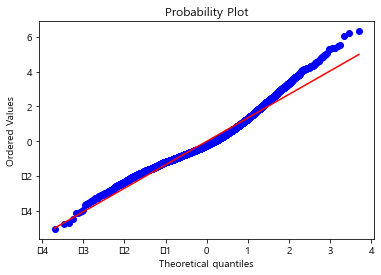

In [77]:
# 잔차의 정규성 확인

import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# 조금 다른 방법으로 회귀분석 수행

res2 = sm.ols(formula='rent_ua ~ usage_area + 지하총층 + 지하철거리m + 승객수점수 + 횡단보도거리m + 건물별전기사용량 + 본번별평균사용량 + 건물연차 + 공시지가 + type_근린상가 + type_단지내상가 + type_복합상가 + 주차가능여부 + 상가유형번호', data = z8)

# 회귀분석 결과에서 잔차만 추출

resid = res2.fit().resid

# Q-Q Plot을 그려서 정규성 확인

from scipy.stats import probplot

plt.figure()
probplot(resid, plot=plt)
plt.show()

설명력을 의미하는 결정계수(R2)에 대한 명확한 기준은 없으나 사회과학에서 통용되는 코헨(Cohen, 1988)의 기준 0.265) 이상인 경우를 채택할 수 있다.